In [1]:
from test.test_maps import *

#draw_maps()

In [2]:
from test.test_sensor import *

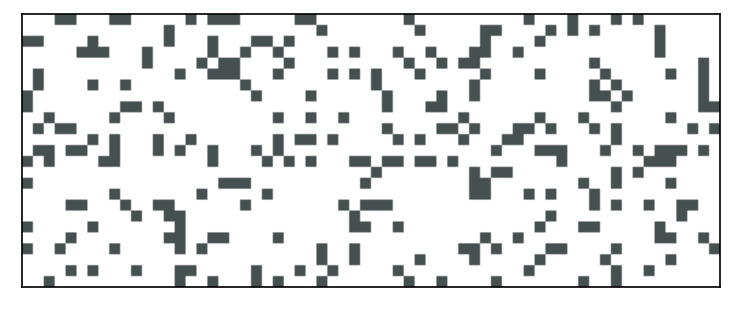

In [3]:
draw(sensor_maps[5])

In [4]:
from src.A_star_Replanning.a_star_replanning import *

In [5]:
f, p, open, closed = a_star_replanning(sensor_maps[5], (0,0), (23, 63))

In [6]:
f

True

In [7]:
len(p)

131

In [8]:
open.nodes_added

14450

In [9]:
closed.nodes_added

5181

In [10]:
from src.D_star_Lite.d_star_lite import *

In [11]:
f, p, open, closed = d_star_lite(sensor_maps[5], (0,0), (23, 63))

In [12]:
f

True

In [13]:
open.nodes_added

3059

In [14]:
closed.nodes_added

1620

In [15]:
len(p)

119

In [16]:
from src.LSS_LRTA_star.lss_lrta_star import *

In [17]:
f, p, open, closed = lss_lrta_star(sensor_maps[4], (0,0), (23, 63), lookahead=25)

suka


KeyboardInterrupt: 

In [ ]:
f

In [ ]:
open.nodes_added

In [ ]:
closed.nodes_added

In [ ]:
len(p)

# Эксперименты

In [1]:
from test.test_rnd import test_rnd
from src.A_star_Replanning.a_star_replanning import *
from src.D_star_Lite.d_star_lite import *

In [2]:
reults_rnd_asr = test_rnd(a_star_replanning)

In [3]:
reults_rnd_asr

{10: (4.5041, 2.211599999999999),
 15: (4.7991111111111096, 2.3047555555555546),
 20: (4.756800000000001, 2.2284499999999996),
 25: (5.114384000000001, 2.366832),
 30: (5.282288888888886, 2.41428888888889),
 35: (5.0512979591836755, 2.2824489795918375),
 40: (4.9801937500000015, 2.2601374999999995)}

In [4]:
reults_rnd_dsl = test_rnd(d_star_lite)

In [5]:
reults_rnd_dsl

{10: (1.4086999999999994, 0.7369000000000002),
 15: (1.4989777777777773, 0.7711999999999999),
 20: (1.462075, 0.729075),
 25: (1.6681119999999994, 0.8291680000000003),
 30: (1.593077777777778, 0.7847444444444446),
 35: (1.5635918367346944, 0.763412244897959),
 40: (1.598162500000001, 0.7809499999999998)}

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
vertex_acceses_rnd_asr = np.array(list(map(lambda x: x[0], reults_rnd_asr.values())))-1
nodes_expanded_rnd_asr = np.array(list(map(lambda x: x[1], reults_rnd_asr.values())))-1
vertex_acceses_rnd_dsl = np.array(list(map(lambda x: x[0], reults_rnd_dsl.values())))-1
nodes_expanded_rnd_dsl = np.array(list(map(lambda x: x[1], reults_rnd_dsl.values())))-1

In [8]:
vertex_acceses_rnd_asr[vertex_acceses_rnd_asr < 0] = 0.0
nodes_expanded_rnd_asr[nodes_expanded_rnd_asr < 0] = 0.0
vertex_acceses_rnd_dsl[vertex_acceses_rnd_dsl < 0] = 0.0
nodes_expanded_rnd_dsl[nodes_expanded_rnd_dsl < 0] = 0.0

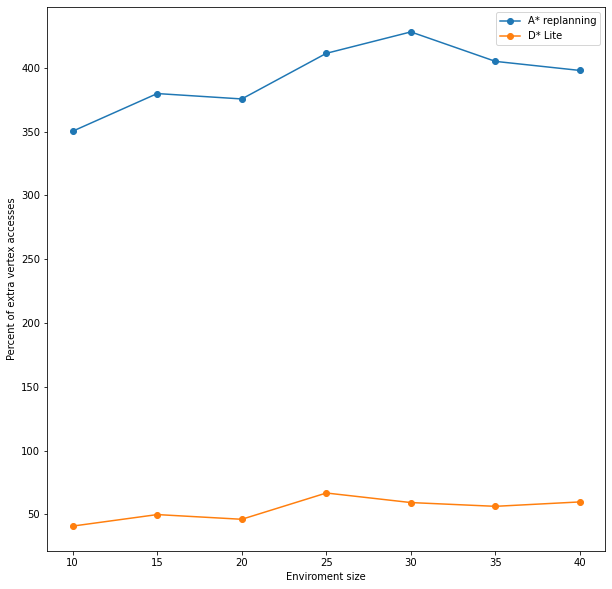

In [9]:
plt.figure(figsize=(10,10))
plt.plot(reults_rnd_asr.keys(), vertex_acceses_rnd_asr*100, marker='o')
plt.plot(reults_rnd_asr.keys(), vertex_acceses_rnd_dsl*100, marker='o')
plt.legend(['A* replanning', 'D* Lite'])
plt.xlabel('Enviroment size')
plt.ylabel('Percent of extra vertex accesses')
plt.show()

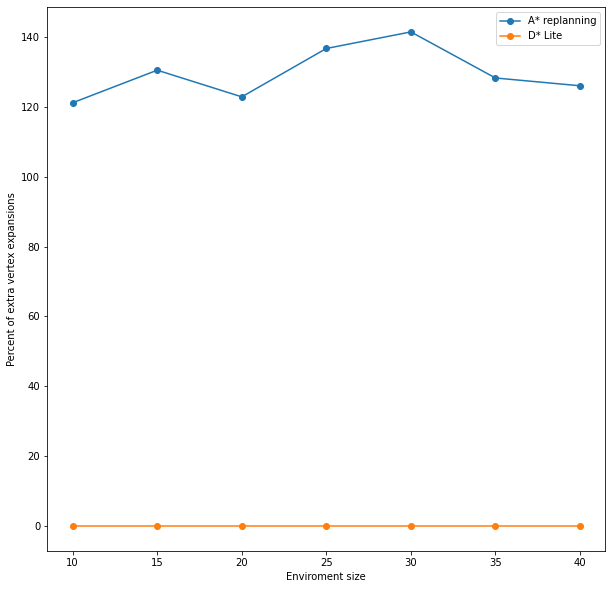

In [10]:
plt.figure(figsize=(10,10))
plt.plot(reults_rnd_asr.keys(), nodes_expanded_rnd_asr*100, marker='o')
plt.plot(reults_rnd_asr.keys(), nodes_expanded_rnd_dsl*100, marker='o')
plt.legend(['A* replanning', 'D* Lite'])
plt.xlabel('Enviroment size')
plt.ylabel('Percent of extra vertex expansions')
plt.show()

In [5]:
from test.test_sensor import *
from src.A_star_Replanning.a_star_replanning import *
from src.D_star_Lite.d_star_lite import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
reults_sensor_asr = test_sensor(a_star_replanning)
reults_sensor_asr

{1: (6.999106249999999, 3.434106250000001),
 5: (15.037043749999995, 7.395075000000002),
 10: (12.335081249999996, 6.149718749999998),
 15: (10.041643749999999, 5.125024999999998),
 20: (7.750818749999996, 3.969793750000002)}

In [7]:
reults_sensor_dsl = test_sensor(a_star_replanning)
reults_sensor_dsl

{1: (1.475587500000001, 0.7749562499999998),
 5: (1.2565375000000003, 0.6709874999999996),
 10: (1.2167687500000006, 0.6466999999999998),
 15: (1.1020125, 0.5900374999999998),
 20: (1.15111875, 0.6126062499999999)}

In [10]:
vertex_acceses_sensor_asr = np.array(list(map(lambda x: x[0], reults_sensor_asr.values())))-1
nodes_expanded_sensor_asr = np.array(list(map(lambda x: x[1], reults_sensor_asr.values())))-1
vertex_acceses_sensor_dsl = np.array(list(map(lambda x: x[0], reults_sensor_dsl.values())))-1
nodes_expanded_sensor_dsl = np.array(list(map(lambda x: x[1], reults_sensor_dsl.values())))-1

vertex_acceses_sensor_asr[vertex_acceses_sensor_asr < 0] = 0.0
nodes_expanded_sensor_asr[nodes_expanded_sensor_asr < 0] = 0.0
vertex_acceses_sensor_dsl[vertex_acceses_sensor_dsl < 0] = 0.0
nodes_expanded_sensor_dsl[nodes_expanded_sensor_dsl < 0] = 0.0

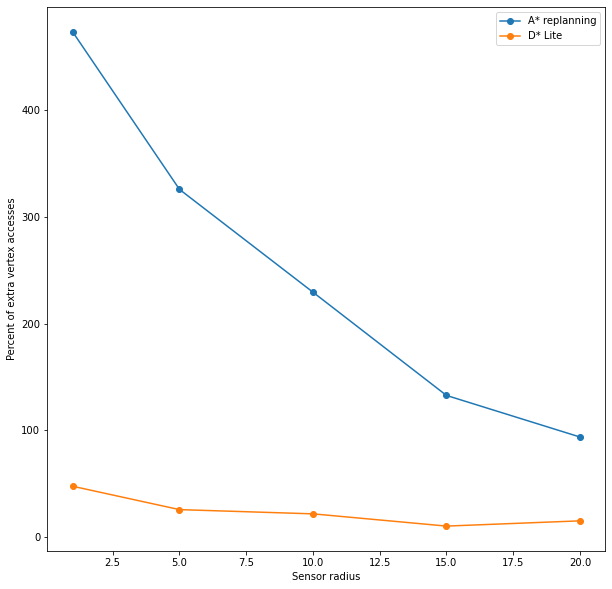

In [11]:
plt.figure(figsize=(10,10))
plt.plot(reults_sensor_asr.keys(), vertex_acceses_sensor_asr*100, marker='o')
plt.plot(reults_sensor_asr.keys(), vertex_acceses_sensor_dsl*100, marker='o')
plt.legend(['A* replanning', 'D* Lite'])
plt.xlabel('Sensor radius')
plt.ylabel('Percent of extra vertex accesses')
plt.show()

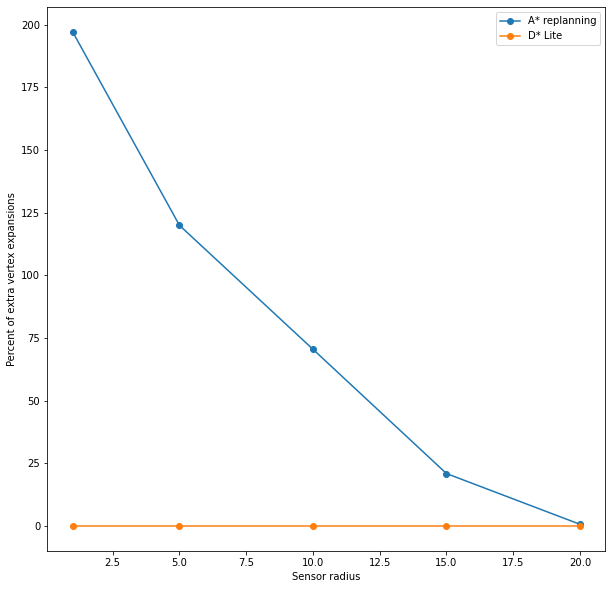

In [13]:
plt.figure(figsize=(10,10))
plt.plot(reults_sensor_asr.keys(), nodes_expanded_sensor_asr*100, marker='o')
plt.plot(reults_sensor_asr.keys(), nodes_expanded_sensor_dsl*100, marker='o')
plt.legend(['A* replanning', 'D* Lite'])
plt.xlabel('Sensor radius')
plt.ylabel('Percent of extra vertex expansions')
plt.show()